# Setup

Importing libraries and mounting Google Drive to perform data I/O

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

Mounted at /content/drive


# Read combined unclean data

In [2]:
data_filepath = '/content/drive/MyDrive/AML Group 24/Files/'
data = pd.read_parquet(data_filepath + 'combined/met_gas_site.snappy.parquet', engine='pyarrow')
data = data.drop(columns=['UPDATE_DATE', 'Filename', 'FLOW_23M', 'FLOW_2M'])

## Summary of missing values in unclean data

In [3]:
pd.DataFrame({'Total': [len(data)]*len(data.columns), 'Missing Values': (np.sum(data.isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(data.isna(), axis=0)/len(data)*100).tolist()}, index=data.columns)

,Total,Missing Values,Missing Values %
SITE_ID,574851,0,0.000000
DATE_TIME,574851,0,0.000000
TEMPERATURE,574851,275,0.047838
TEMPERATURE_F,574851,561732,97.717843
TEMPERATURE_DELTA,574851,462665,80.484334
TEMPERATURE_DELTA_F,574851,107472,18.695627
RELATIVE_HUMIDITY,574851,219210,38.133360
RELATIVE_HUMIDITY_F,574851,350549,60.980845
SOLAR_RADIATION,574851,225022,39.144404
SOLAR_RADIATION_F,574851,337172,58.653808


# Shortlisting variables

We select only those variables that have less than 70% missing values because extremely high proportion of missing values will not be meaningful to the modeling process.

In [4]:
clean_columns = ['SITE_ID', 'DATE_TIME', 'TEMPERATURE', 'RELATIVE_HUMIDITY', 'SOLAR_RADIATION', 'OZONE', 'PRECIPITATION', 'WINDSPEED', 'WIND_DIRECTION', 'SIGMA_THETA', 'FLOW_RATE', 'WINDSPEED_SCALAR', 'SHELTER_TEMPERATURE', 'QA_CODE', 'NO', 'NOY', 'NOYDIF', 'SO2_GA', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'LAND_USE', 'TERRAIN']
clean_data = data.loc[:, clean_columns]

# Visualizing missing data

We develop a heatmap of missing data to observe any trends that can be fixed

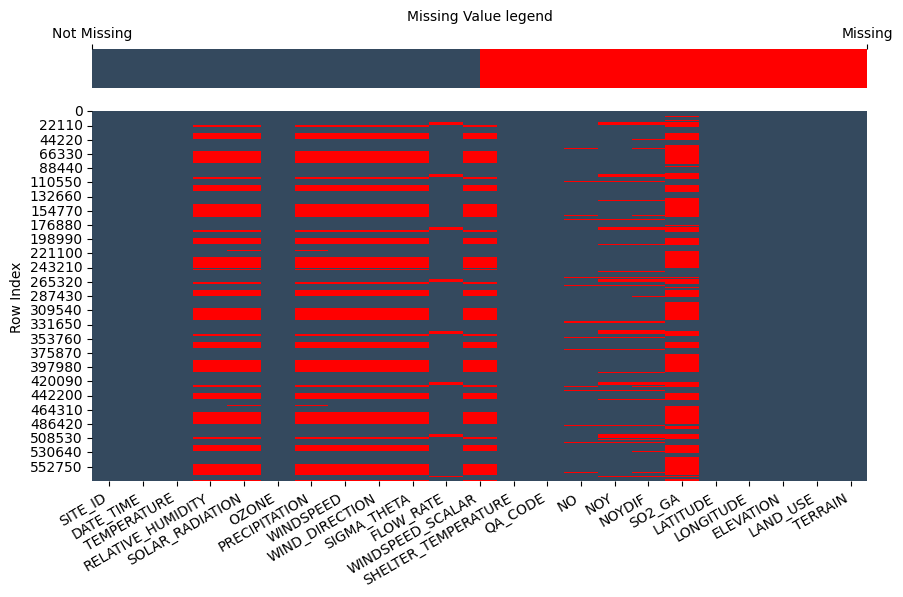

In [5]:
colours = ['#34495E', 'red']
fig, ax = plt.subplots(figsize=(10,6))
def format_func(x, pos):
  if x == 1:
    return 'Missing'
  else:
    return 'Not Missing'
sns.heatmap(clean_data.isnull(), ax=ax, cmap=sns.color_palette(colours), cbar_kws={'ticks':[0, 1], 'format':FuncFormatter(format_func), 'label':'Missing Value legend', 'location':'top'});
ax.set_ylabel('Row Index');
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

# Exploring trends across stations

We plot a heatmap of missing values of every station.

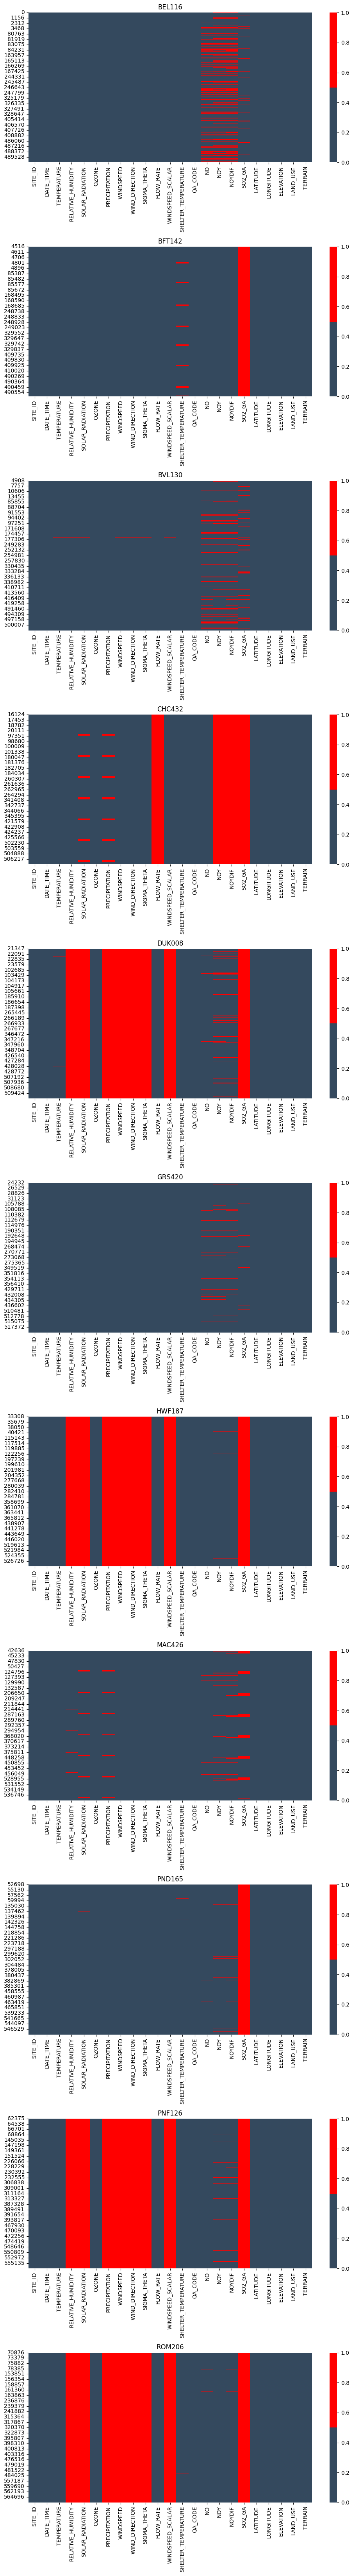

In [6]:
site_ids = clean_data['SITE_ID'].unique()
fig, ax = plt.subplots(len(site_ids), 1, figsize=(10, len(site_ids)*6))
for i, site_id in enumerate(site_ids):
  sns.heatmap(clean_data.loc[clean_data['SITE_ID'] == site_id].isnull(), cmap=sns.color_palette(colours), ax=ax[i])
  ax[i].set_title(site_id)
fig.tight_layout()

 We eliminate those stations that have multiple 100% missing variables.

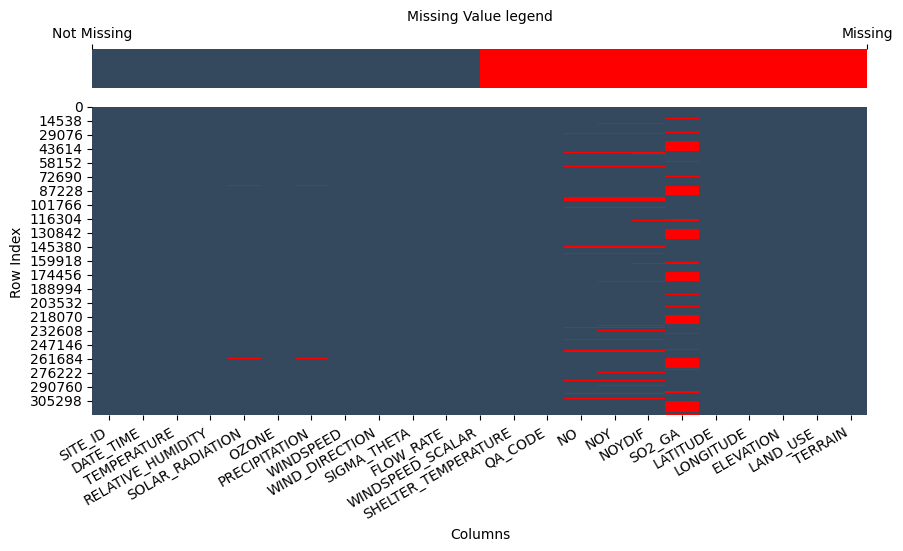

In [7]:
clean_data = clean_data.loc[clean_data['SITE_ID'].isin(['BEL116', 'BFT142', 'BVL130', 'GRS420', 'MAC426', 'PND165'])].reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(clean_data.isnull(), ax=ax, cmap=sns.color_palette(colours), cbar_kws={'ticks':[0, 1], 'format':FuncFormatter(format_func), 'label':'Missing Value legend', 'location':'top'});
ax.set_ylabel('Row Index');
ax.set_xlabel('Columns');
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

These missing values now look manageable

## Summary of missing values in filtered data

In [8]:
pd.DataFrame({'Total': [len(clean_data)]*len(clean_columns), 'Missing Values': (np.sum(clean_data[clean_columns].isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(clean_data[clean_columns].isna(), axis=0)/len(clean_data)*100).tolist()}, index=clean_columns)

,Total,Missing Values,Missing Values %
SITE_ID,319835,0,0.000000
DATE_TIME,319835,0,0.000000
TEMPERATURE,319835,113,0.035331
RELATIVE_HUMIDITY,319835,1380,0.431472
SOLAR_RADIATION,319835,3685,1.152157
OZONE,319835,0,0.000000
PRECIPITATION,319835,3417,1.068363
WINDSPEED,319835,142,0.044398
WIND_DIRECTION,319835,211,0.065972
SIGMA_THETA,319835,142,0.044398


# Imputation of missing values

We imputed missing values with the mean of the variables.

In [9]:
print("Imputing missing values in the following columns:")
for col in clean_data.columns:
  if np.sum(clean_data[col].isna()) > 0:
    print(col)
    clean_data[col] = clean_data[col].fillna(np.mean(clean_data[col]))

Imputing missing values in the following columns:
TEMPERATURE
RELATIVE_HUMIDITY
SOLAR_RADIATION
PRECIPITATION
WINDSPEED
WIND_DIRECTION
SIGMA_THETA
FLOW_RATE
WINDSPEED_SCALAR
SHELTER_TEMPERATURE
NO
NOY
NOYDIF
SO2_GA


## Summary of missing values in clean and imputed data

In [10]:
pd.DataFrame({'Total': [len(clean_data)]*len(clean_columns), 'Missing Values': (np.sum(clean_data[clean_columns].isna(), axis=0)).tolist(), 'Missing Values %': (np.sum(clean_data[clean_columns].isna(), axis=0)/len(clean_data)*100).tolist()}, index=clean_columns)

,Total,Missing Values,Missing Values %
SITE_ID,319835,0,0.0
DATE_TIME,319835,0,0.0
TEMPERATURE,319835,0,0.0
RELATIVE_HUMIDITY,319835,0,0.0
SOLAR_RADIATION,319835,0,0.0
OZONE,319835,0,0.0
PRECIPITATION,319835,0,0.0
WINDSPEED,319835,0,0.0
WIND_DIRECTION,319835,0,0.0
SIGMA_THETA,319835,0,0.0


# Saving clean and imputed data

In [ ]:
clean_data.to_parquet('/content/drive/MyDrive/AML Group 24/Files/met_gas_site_cleaned.snappy.parquet', engine='pyarrow')